# Project Titanic - Machine Learning from Disaster
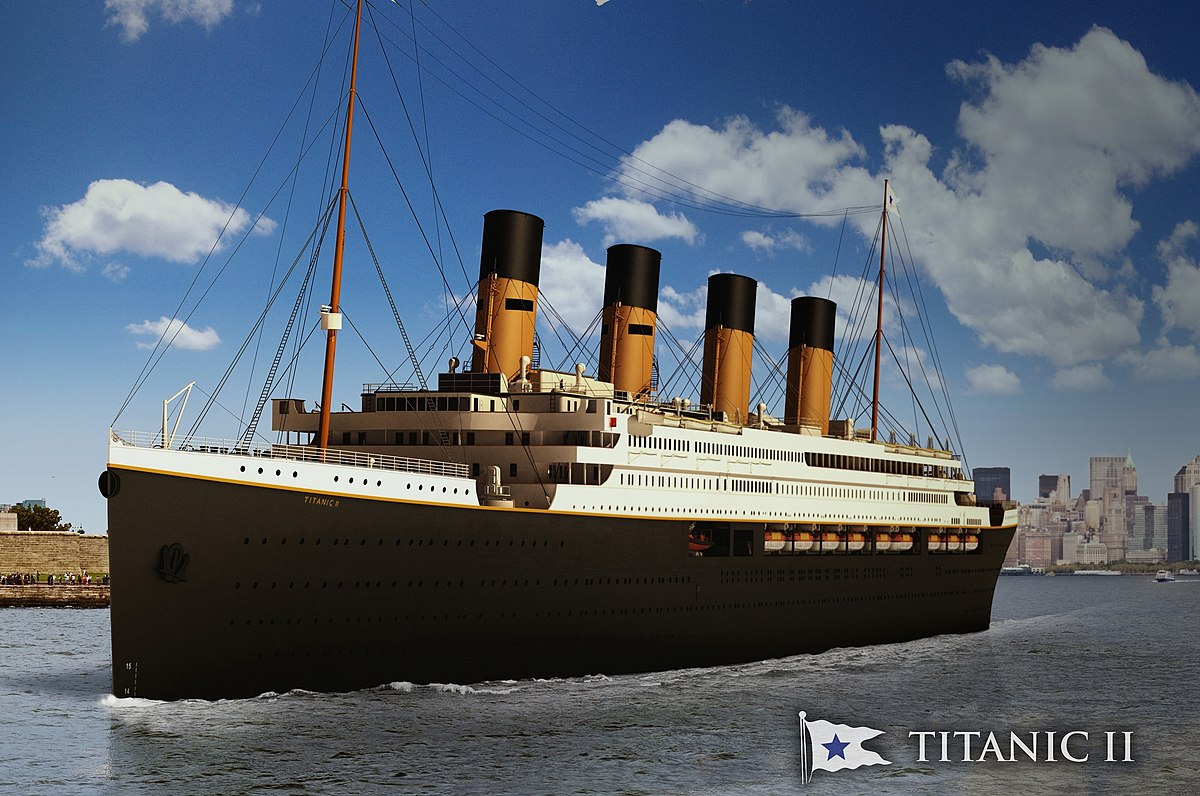


In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [182]:
%matplotlib inline

# 1. Loading Data

In [109]:
test_df = pd.read_csv("./titanic/test.csv", index_col = "PassengerId")
train_df = pd.read_csv("./titanic/train.csv", index_col = "PassengerId")

In [110]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1. Feature Classification: Categorical vs Numerical
- This helps us select the appropriate plots for visualization.
### Which features are categorical?
- Categorical Features: `nominal`, `ordinal`, `ratio`, `interval`
- To classify the samples into sets of similar samples
- `Survived` `Sex` `Embarked`  `Pclass`   
### Which features are numerical?
- Numerical features: discrete, continuous, or timeseries
- These values change from sample to sample|

In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [113]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal), `SibSp` , `Parch`
- Numerical: (continuous) `Age`, `Fare`, (discrete)

- Mix types of data: `Ticket`, `Cabin`

- Contain Error/Typo: `Name`
- Blank or Null: `Cabin` > `Age` > `Embarked`
- Various Data Type: String, Int, Float

According to the data dictionary, we know that if a passernger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flag for the person's survivorship. Yet the data type of the column is int64, which is a numerical type. We can change that with the following command.

In [181]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [115]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category") #df.Pclass, df."Pclass" => df["Pclass"]
convert_cat(train_df, features)
convert_cat(test_df, features)

In [116]:
train_df["Sex"].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

In [117]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### 1.1.1. Distribution of Numerical feature values across the samples

In [118]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### 1.1.2. Distribution of Categorical features

In [119]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 2. Exploratory Data Analysis (EDA)

## 2.1 Corelting Categorical Featues
- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal), `SibSp` , `Parch`

### Target Variable `Survived`

In [120]:
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [121]:
train_df["Survived"].value_counts(normalize=True).to_frame()
#Convert to %

,Survived
0,0.616162
1,0.383838


#### `SEX`


In [122]:
train_df["Sex"].value_counts().to_frame()

,Sex
male,577
female,314


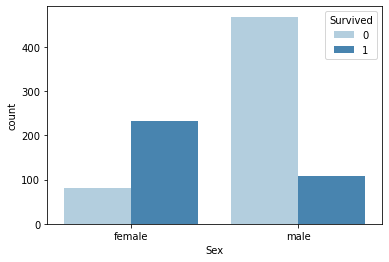

In [123]:
sns.countplot(data=train_df, x='Sex', hue='Survived', palette ='Blues');

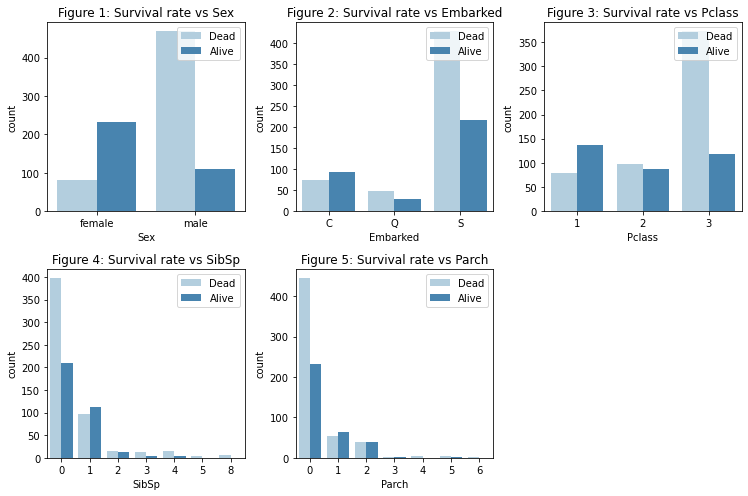

In [146]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

#Tạo 6 dồ thị
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list cols
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue='Survived', palette ='Blues', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Dead', 'Alive'])
            
ax.flat[-1].set_visible(False) #Delete the last Subplot
plt.tight_layout() #Chống các đồ thị chồng lên nhau



## Observation:
* Survival Rate
    - Fig 1: Female survival rate > male
    - Fig 2: Most people embarkerd on Southamton and also had the highest people not survived
    - Fig 3:1st Class higher survival rate
    - Fig 4: People going with 0 `SibSp` are mostly not survival, the number of passenger with 1-2 family members has a better change of survival
    - Fig5: People going with 0 `Parch` are almost no survival


## 3.2 EDA for Numerical Features
- Numerical: (continuous) `Age`, `Fare`, (discrete)

### Age

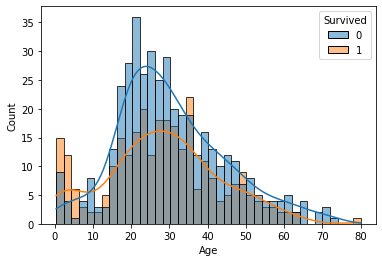

In [154]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins = 40, kde=True);

In [156]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

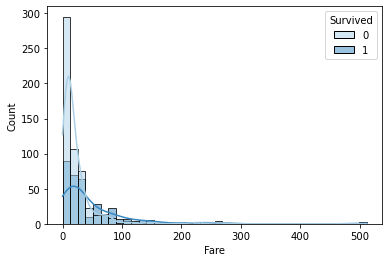

In [166]:
sns.histplot(data=train_df, x='Fare', bins= 40, hue='Survived', kde=True, palette = 'Blues')

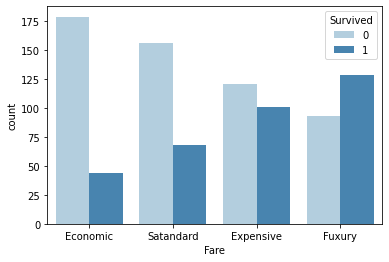

In [180]:
#To name for 0-25%, quartile, 25-50, 50-75, 75-100
fare_categories = ['Economic','Satandard','Expensive','Fuxury']
quartile_data = pd.qcut(train_df['Fare'],4, labels =fare_categories )

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette = 'Blues');

- Distribution of Fare
    - Fare does not follow a normal distribution and has a huge spike at the price range ` [0-100]'
    - The distribution is skewwed to the left with `75`%` of the fare paid under `$31` `and a max paid fare of`  `$512` 

- Quartile Plot
     - Passenger with Luxury and Expensive Fare will have more chance to Survive

# 4. Feature Engineering & Data Wrangling